<a href="https://colab.research.google.com/github/man-like-vinny/AML-Lab/blob/main/test_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from scipy.fft import fft, ifft, fftfreq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('TESTING.csv')
data


,seq,terrain,orient1_x,orient1_y,orient1_z,angvel1_x,angvel1_y,angvel1_z,linacc1_x,linacc1_y,...,linacc2_z,mag2_x,mag2_y,mag2_z,acc2_x,acc2_y,acc2_z,grav2_x,grav2_y,grav2_z
0,401,Test,235.00,0.69,4.94,-0.01,-0.02,0.05,-0.05,0.00,...,0.07,15.75,-8.38,-14.06,-0.01,-0.73,9.78,0.22,-0.75,9.77
1,402,Test,234.81,0.00,3.81,-0.11,-0.05,0.10,-0.10,-0.25,...,-0.17,16.50,-9.19,-13.75,-0.08,-0.83,9.61,0.10,-0.57,9.78
2,403,Test,233.56,-0.31,3.88,0.01,0.05,0.14,0.09,-0.35,...,0.09,17.25,-9.19,-13.75,0.07,-0.95,9.88,-0.04,-0.60,9.78
3,404,Test,234.31,0.12,4.12,0.03,-0.05,-0.32,0.14,0.10,...,-0.16,17.25,-9.19,-12.56,0.03,-0.41,9.48,0.07,-0.64,9.78
4,405,Test,234.94,-0.25,4.25,-0.20,0.07,-0.06,0.30,-0.35,...,0.47,16.50,-8.75,-13.75,-0.49,-1.29,10.60,-0.13,-0.71,9.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1281,Mud,254.12,-4.00,1.44,-1.18,0.41,0.11,0.02,0.74,...,1.97,21.38,-5.75,-27.88,-0.74,0.34,11.68,-1.36,0.23,9.70
881,1282,Mud,254.69,-4.00,2.62,-0.74,0.24,-0.05,0.21,-2.41,...,-0.49,21.75,-6.50,-28.25,-0.74,-2.71,9.23,-1.13,0.43,9.73
882,1283,Mud,256.06,-2.62,2.00,-0.06,-0.02,-0.15,0.13,-0.24,...,-0.12,21.06,-5.38,-28.69,-0.17,-0.39,9.63,-0.85,0.50,9.75
883,1284,Mud,256.81,-2.62,2.00,-0.04,0.03,0.09,-0.37,0.18,...,-0.05,21.06,-5.38,-28.25,-0.86,-0.13,8.11,-0.81,0.32,9.76


<Figure size 432x288 with 0 Axes>

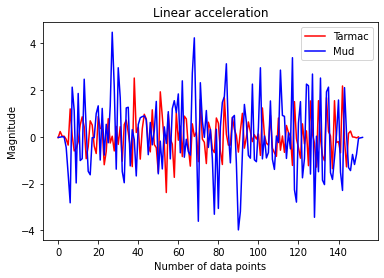

<Figure size 432x288 with 0 Axes>

In [21]:
linacc1_x_tarmac = data.loc[data["terrain"] == "Tarmac", "linacc1_x"]
linacc1_x_mud = data.loc[data["terrain"] == "Mud", "linacc1_x"]

linacc1_y = data.loc[data["terrain"] == "Test", "linacc1_y"]
linacc1_z = data.loc[data["terrain"] == "Test", "linacc1_z"]

angvel1_x_tarmac = data.loc[data["terrain"] == "Tarmac", "angvel1_x"]
angvel1_x_mud = data.loc[data["terrain"] == "Mud", "angvel1_x"]

angvel1_z = data.loc[data["terrain"] == "Stairs", "angvel1_z"]

plt.plot(np.arange(0, 151, 1), linacc1_x_tarmac, color='red')
plt.plot(np.arange(0, 153, 1), linacc1_x_mud, color='blue')
plt.title("Linear acceleration")
plt.xlabel("Number of data points")
plt.ylabel("Magnitude")
plt.legend(["Tarmac", "Mud"], loc ="upper right")
plt.figure()

<Figure size 432x288 with 0 Axes>

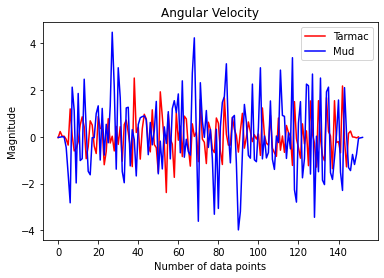

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(np.arange(0, 151, 1), angvel1_x_tarmac, color='red')
plt.plot(np.arange(0, 153, 1), angvel1_x_mud, color='blue')
plt.title("Angular Velocity")
plt.xlabel("Number of data points")
plt.ylabel("Magnitude")
plt.legend(["Tarmac", "Mud"], loc ="upper right")
plt.figure()

Text(0.5, 1.0, 'Gaussian smoothing filter')

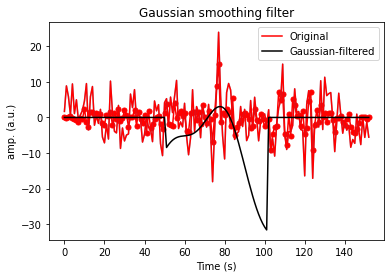

In [41]:
#Using gaussian Kernal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sigRate = 2000 #Hz
time = np.arange(0,153, 1)
n = len(time)
p = 15 #poles for random interpolation
#ampl = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
ampl = linacc1_x_mud
noiseamp = 5
noise = noiseamp*np.random.randn(n)
signal = ampl + noise
plt.plot(time, ampl, 'ro-', markersize = 5)
plt.plot(time, signal, alpha=0.5)

fwhm = 25 # in ms
k = 50
gauss_time = 2000*np.arange(-k,k)/sigRate
# create Gaussian window
gauss_win = np.exp( -(4*np.log(2)*gauss_time**2) / fwhm**2 )

pstPeakHalf = k + np.argmin( (gauss_win[k:]-.5)**2 )
prePeakHalf = np.argmin( (gauss_win-.5)**2 )
empFWHM = gauss_time[pstPeakHalf] - gauss_time[prePeakHalf]

# initialize filtered signal vector
filtSig_Gauss = np.zeros(n)
# # implement the running mean filter
for i in range(k+1,n-k-1):
    # each point is the weighted average of k surrounding points
    filtSig_Gauss[i] = np.sum( signal[i-k:i+k]*gauss_win )
    
plt.plot(time,signal,'r',label='Original')
plt.plot(time,filtSig_Gauss,'k',label='Gaussian-filtered')
plt.xlabel('Time (s)')
plt.ylabel('amp. (a.u.)')
plt.legend()
plt.title('Gaussian smoothing filter')

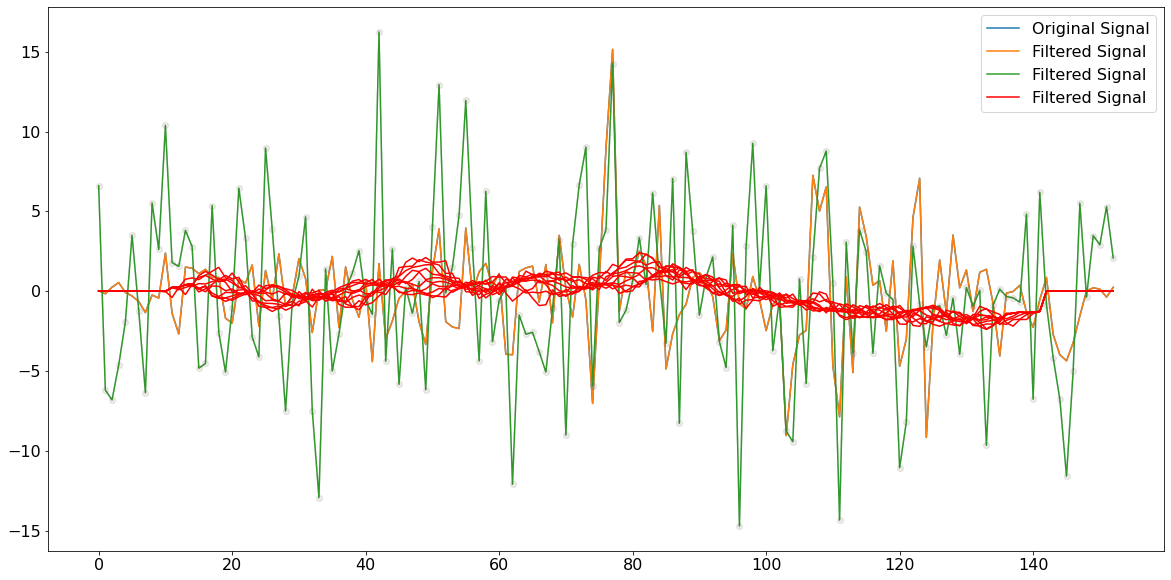

In [57]:
#Mean filter

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy
%matplotlib inline

plt.rcParams["font.size"] = 16
plt.rcParams['figure.figsize'] = (20, 10)
sigRate = 1 #Hz
time = np.arange(0,153, 1/sigRate)
n = len(time)
p = 15 #poles for random interpolation
ampl = linacc1_x_mud
plt.plot(time, ampl)

noiseamp = 5
noise = noiseamp*np.random.randn(n)
signal = ampl + noise

plt.plot(time, ampl)
plt.plot(time, signal)

#initializing
filtSig = np.zeros(n)
k = 20
for i in range(k,n-k-1):
    # each point is the average of k surrounding points
    filtSig[i] = np.mean(signal[i-k:i+k])

#initializing
filtSig = np.zeros(n)
#filtSig = map(lambda i : np.mean(signal[i-k:i+k], signal))
for k in range(10,20):
    for i in range(k,n-k-1):
        filtSig[i] = np.mean(signal[i-k:i+k])
    
    plt.plot(time, filtSig, color='red') 
    plt.plot(time, signal, marker='o', alpha=0.01)
    plt.legend(["Original Signal", "Filtered Signal", "Filtered Signal", "Filtered Signal"], loc ="upper right")


In [ ]:
# linacc1_z_fft = fft(linacc1_z.to_numpy())

# # Number of sample points
# N = 144
# # sample spacing
# T = 1.0 / 800.0
# x = np.linspace(0.0, N*T, N, endpoint=False)
# yf = fft(linacc1_z.to_numpy())
# xf = fftfreq(N, T)[:N//2]


#print(linacc1_z_fft.shape)

#plt.plot(xf, yf)